# Write programs to perform the following sharpening operations on a grayscale image:
#a. Laplacian filter
#b. Filtering using composite mask
#c. Unsharp masking
#d. High boost filtering
#e. Filtering using first order derivative operators such as sobel and prewitt mask.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
input_image = cv2.imread('/content/Lenna.png')

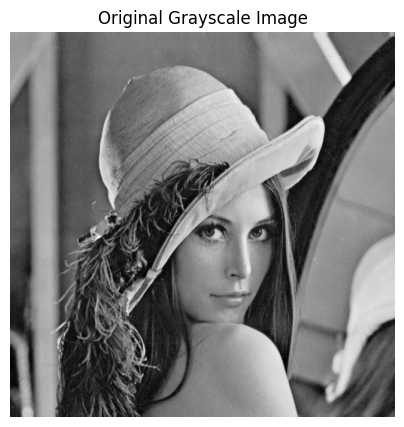

In [ ]:
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

**a. Laplacian filter**


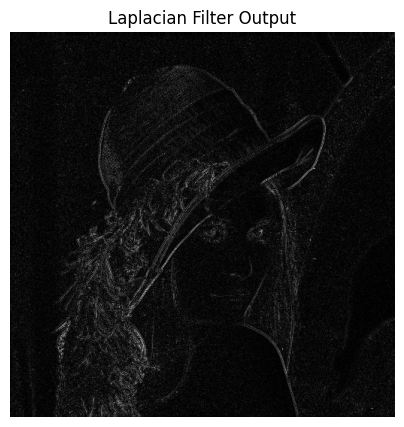

In [ ]:
def apply_laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(laplacian)

    plt.figure(figsize=(5, 5))
    plt.imshow(sharpened, cmap='gray')
    plt.title("Laplacian Filter Output")
    plt.axis('off')
    plt.show()

    return sharpened

laplacian_image = apply_laplacian_filter(gray_image)


**b. Filtering using composite mask**

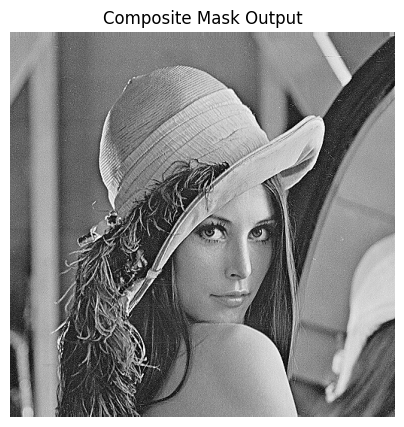

In [ ]:
def apply_composite_mask(image):
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])  # Sharpening Kernel
    composite = cv2.filter2D(image, -1, kernel)

    plt.figure(figsize=(5, 5))
    plt.imshow(composite, cmap='gray')
    plt.title("Composite Mask Output")
    plt.axis('off')
    plt.show()

    return composite

composite_image = apply_composite_mask(gray_image)


**c. Unsharp masking**

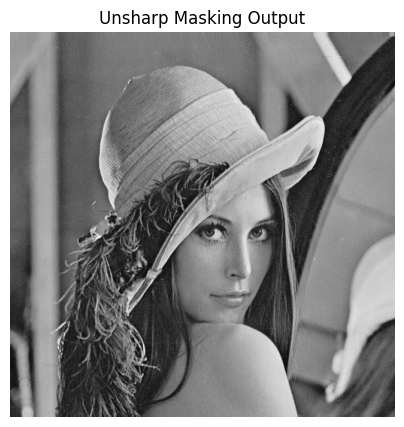

In [ ]:
def apply_unsharp_masking(image):
    blurred = cv2.GaussianBlur(image, (5,5), 1.0)
    unsharp = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    plt.figure(figsize=(5, 5))
    plt.imshow(unsharp, cmap='gray')
    plt.title("Unsharp Masking Output")
    plt.axis('off')
    plt.show()

    return unsharp

unsharp_image = apply_unsharp_masking(gray_image)


**d. High boost filtering**

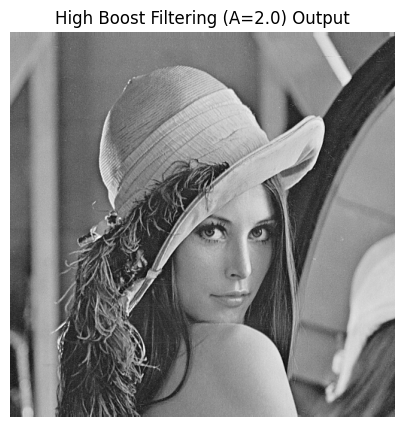

In [ ]:
def apply_high_boost_filter(image, A=1.5):
    blurred = cv2.GaussianBlur(image, (5,5), 1.0)
    high_boost = cv2.addWeighted(image, A, blurred, -(A-1), 0)

    plt.figure(figsize=(5, 5))
    plt.imshow(high_boost, cmap='gray')
    plt.title(f"High Boost Filtering (A={A}) Output")
    plt.axis('off')
    plt.show()

    return high_boost

high_boost_image = apply_high_boost_filter(gray_image, A=2.0)


**e. Filtering using first order derivative operators such as sobel and prewitt mask.**

**Sobel filter**

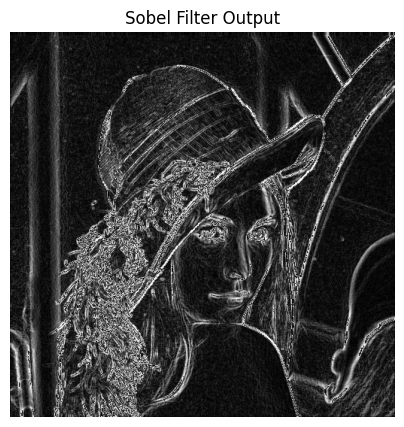

In [ ]:
def apply_sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.convertScaleAbs(sobel_x) + cv2.convertScaleAbs(sobel_y)

    plt.figure(figsize=(5, 5))
    plt.imshow(sobel_combined, cmap='gray')
    plt.title("Sobel Filter Output")
    plt.axis('off')
    plt.show()

    return sobel_combined

sobel_image = apply_sobel_filter(gray_image)


**prewitt filter**

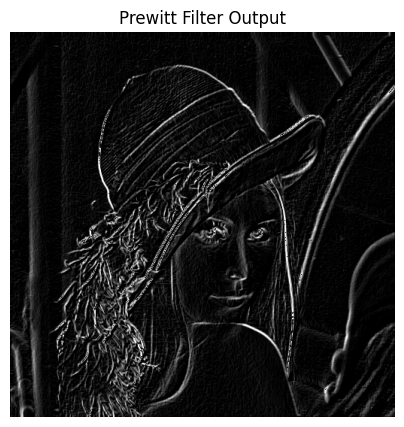

In [ ]:
def apply_prewitt_filter(image):
    prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_combined = cv2.convertScaleAbs(prewitt_x) + cv2.convertScaleAbs(prewitt_y)

    plt.figure(figsize=(5, 5))
    plt.imshow(prewitt_combined, cmap='gray')
    plt.title("Prewitt Filter Output")
    plt.axis('off')
    plt.show()

    return prewitt_combined

prewitt_image = apply_prewitt_filter(gray_image)
